In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import cv2
import PIL

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='C:\\Users\\ysaru\\Desktop\\Datasets', untar=True)

228813984/228813984 [==============================] - 57s 0us/step


In [2]:
data_dir = 'C:\\Users\\User\\Desktop\\Datasets\\datasets\\flower_photos'

In [3]:
import pathlib                
data_dir = pathlib.Path(data_dir)       # pathlib.Path is used to convert above file path to Windows path
data_dir

WindowsPath('C:/Users/User/Desktop/Datasets/datasets/flower_photos')

In [4]:
# .glob is used to access subfolders and files within the windows path folder

image_count = len(list(data_dir.glob('*/*.jpg')))     
image_count

3670

In [5]:
# here using .glob we are getting list of the file paths of all the image files within roses folder

roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/User/Desktop/Datasets/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/User/Desktop/Datasets/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/User/Desktop/Datasets/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/User/Desktop/Datasets/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/User/Desktop/Datasets/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

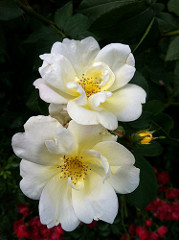

In [6]:
# PIL is used to open an image file in jupyter notebook using the Windows file path, but first windows file path needs to 
# be converted to str

PIL.Image.open(str(roses[0]))

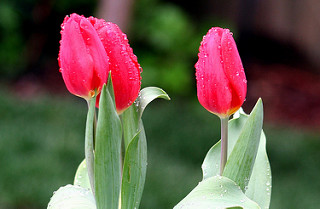

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [9]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [10]:
str(flowers_images_dict['roses'][0])

'C:\\Users\\User\\Desktop\\Datasets\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [11]:
# cv2.imread is used convert the image file present in the str(Windows file path) to a numpy array

img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [12]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [13]:
# cv2.resize is used to resize the original image size

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [15]:
# here we are getting our X and y ready. We are iterating through the flowers_images_dict dictionary items,
# then iterating through the list of Windows file paths (value in the dictionary is a list of Windows file paths),
# then converting each mage using its file path to a numpy array, then resizing each image to a standard size (180,180)
# then we are appending each of these numpy array to X. So basically each image is being converted to a numpy array 
# and then beng added one by one to X. For y, we are adding the number associated with each flower,
# using the flowers_labels_dict we created earlier.

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
y[:5]

array([0, 0, 0, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
len(X_train)

2752

In [22]:
len(X_test)

918

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [25]:
num_classes = 5

model = Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)     # if we dont mention any activation by defualt its linear activation
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [26]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


86/86 [==============================] - 23s 229ms/step - loss: 1.2992 - accuracy: 0.4539
Epoch 2/5
86/86 [==============================] - 19s 219ms/step - loss: 0.9714 - accuracy: 0.6101
Epoch 3/5
86/86 [==============================] - 19s 220ms/step - loss: 0.8205 - accuracy: 0.6922
Epoch 4/5
86/86 [==============================] - 20s 227ms/step - loss: 0.5997 - accuracy: 0.7802
Epoch 5/5
86/86 [==============================] - 19s 221ms/step - loss: 0.3627 - accuracy: 0.8681


In [27]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 70ms/step - loss: 1.0063 - accuracy: 0.6514


[1.0062994956970215, 0.6514161229133606]

In [28]:
y_pred = model.predict(X_test_scaled)

29/29 [==============================] - 3s 74ms/step


In [29]:
y_pred
# the reason we get numbers like 5, 6, -3, etc is because we didnt use sigmoid or softmax activation function in final layer
# we just used a linear activation, that is the defualt if we dont specify any activation function

array([[-0.26526764,  8.261138  ,  4.5057    , -5.6359415 , -2.0380237 ],
       [ 2.1548922 ,  0.31475365, -2.0757196 , -1.3840747 ,  1.8433589 ],
       [-2.2382808 ,  0.9786872 ,  4.9004707 , -2.2825022 , -2.553451  ],
       ...,
       [-0.98470885, -0.98780364, -1.3056593 ,  4.0150476 , -2.576215  ],
       [ 1.5993536 , -0.47051397,  0.35854852,  0.17355593, -0.24664685],
       [-1.1901983 , -4.8374457 ,  0.57791746,  0.28572473, -0.2290559 ]],
      dtype=float32)

In [30]:
score = tf.nn.softmax(y_pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.9359277e-04, 9.7692215e-01, 2.2850413e-02, 9.0039913e-07,
       3.2884465e-05], dtype=float32)>

In [31]:
np.argmax(score)

1

In [32]:
y_test[0]

1

In [33]:
y_pred1 = tf.nn.softmax(y_pred)
y_pred1

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[1.9359277e-04, 9.7692215e-01, 2.2850413e-02, 9.0039913e-07,
        3.2884465e-05],
       [5.1687449e-01, 8.2077309e-02, 7.5171590e-03, 1.5011749e-02,
        3.7851924e-01],
       [7.7670306e-04, 1.9380569e-02, 9.7853285e-01, 7.4310461e-04,
        5.6673272e-04],
       ...,
       [6.6092541e-03, 6.5888325e-03, 4.7947448e-03, 9.8066139e-01,
        1.3457674e-03],
       [5.5140841e-01, 6.9589116e-02, 1.5944046e-01, 1.3251266e-01,
        8.7049365e-02],
       [7.2068863e-02, 1.8783136e-03, 4.2230919e-01, 3.1530648e-01,
        1.8843710e-01]], dtype=float32)>

In [34]:
y_pred2 = [np.argmax(i) for i in y_pred1]
y_pred2[:5]

[1, 0, 2, 4, 2]

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54       176
           1       0.66      0.58      0.62       154
           2       0.69      0.77      0.72       226
           3       0.60      0.83      0.69       150
           4       0.68      0.59      0.64       212

    accuracy                           0.65       918
   macro avg       0.65      0.65      0.64       918
weighted avg       0.65      0.65      0.65       918



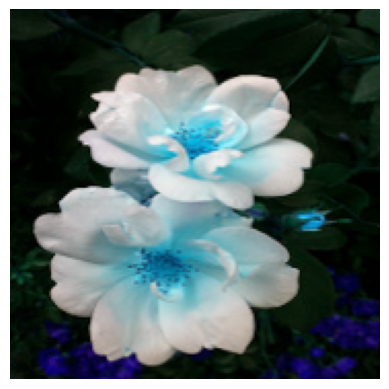

In [36]:
plt.axis('off')
plt.imshow(X[0])

## Using Data Augmentation

In [37]:
data_augmentation1 = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

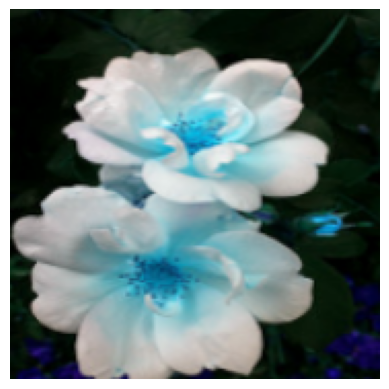

In [38]:
plt.axis('off')
plt.imshow(data_augmentation1(X)[0].numpy().astype('uint8'))

In [38]:
# define data augmentation layer

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal'),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [39]:
# add data augmentation layer before Convolutional layers

num_classes = 5

model1 = Sequential([
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

model1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [40]:
model1.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 31s 312ms/step - loss: 1.3006 - accuracy: 0.4360
Epoch 2/5
86/86 [==============================] - 27s 310ms/step - loss: 1.0457 - accuracy: 0.5861
Epoch 3/5
86/86 [==============================] - 28s 322ms/step - loss: 0.9403 - accuracy: 0.6428
Epoch 4/5
86/86 [==============================] - 27s 308ms/step - loss: 0.8476 - accuracy: 0.6719
Epoch 5/5
86/86 [==============================] - 27s 311ms/step - loss: 0.7734 - accuracy: 0.6969


In [41]:
model1.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 74ms/step - loss: 0.8002 - accuracy: 0.6808


[0.8001890778541565, 0.6808279156684875]

In [42]:
y1_pred = model1.predict(X_test_scaled)

29/29 [==============================] - 3s 78ms/step


In [43]:
y1_pred

array([[ 1.3167655 ,  5.7455297 , -0.37061602, -3.041492  , -0.34068415],
       [ 2.151252  , -0.45322058, -2.1698658 , -1.7901971 ,  2.2509928 ],
       [-0.21976659,  1.7377545 ,  3.0374417 , -2.014502  , -0.36929357],
       ...,
       [ 1.0362965 , -0.334356  , -0.3592692 ,  3.393885  ,  2.1974776 ],
       [ 1.4846596 ,  0.8348832 , -0.8078594 , -2.355237  ,  1.0293846 ],
       [ 2.0219896 , -1.5073962 ,  0.9720558 ,  2.1932628 ,  2.6521423 ]],
      dtype=float32)

In [44]:
y1_pred1 = tf.nn.softmax(y1_pred)
y1_pred1

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[1.1734859e-02, 9.8370701e-01, 2.1709881e-03, 1.5021412e-04,
        2.2369525e-03],
       [4.5217526e-01, 3.3434797e-02, 6.0071615e-03, 8.7812645e-03,
        4.9960145e-01],
       [2.8501434e-02, 2.0184003e-01, 7.4037945e-01, 4.7361236e-03,
        2.4543017e-02],
       ...,
       [6.5527469e-02, 1.6640121e-02, 1.6230687e-02, 6.9232649e-01,
        2.0927522e-01],
       [4.3879983e-01, 2.2912484e-01, 4.4323906e-02, 9.4323633e-03,
        2.7831915e-01],
       [2.2502269e-01, 6.5983245e-03, 7.8749157e-02, 2.6706031e-01,
        4.2256951e-01]], dtype=float32)>

In [45]:
y1_pred2 = [np.argmax(i) for i in y1_pred1]
y1_pred2[:5]

[1, 4, 2, 4, 2]

In [46]:
print(classification_report(y_test,y1_pred2))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       176
           1       0.64      0.69      0.66       154
           2       0.80      0.69      0.74       226
           3       0.69      0.84      0.76       150
           4       0.68      0.61      0.65       212

    accuracy                           0.68       918
   macro avg       0.68      0.69      0.68       918
weighted avg       0.69      0.68      0.68       918

